In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 

In [2]:
tickers = ['PG', 'MSFT', 'F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1') ['Adj Close']

In [3]:
mydata.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6815 entries, 1995-01-03 to 2022-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6815 non-null   float64
 1   MSFT    6815 non-null   float64
 2   F       6815 non-null   float64
 3   GE      6815 non-null   float64
dtypes: float64(4)
memory usage: 266.2 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971117,2.374854,4.358238,32.877308
1995-01-04,7.907221,2.392117,4.475501,32.877308
1995-01-05,7.795400,2.352660,4.436412,32.957893
1995-01-06,7.811379,2.392117,4.436412,32.796745
1995-01-09,7.779429,2.377321,4.514588,32.474415


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-01-19,161.130005,303.329987,22.450001,100.620003
2022-01-20,162.000000,301.600006,21.650000,98.250000
2022-01-21,162.619995,296.029999,20.650000,96.300003
2022-01-24,161.300003,296.369995,20.389999,96.910004
2022-01-25,159.720001,291.700012,19.945000,90.970001


NORMALIZANDO COM 100 => P1/P0 *100
O INDEXADOR ILOC=(0) TRAZ A PRIMEIRA LINHA DE TODOS OS DADOS
com isso o grafico sempre começa no ponto incial de 100

In [6]:
mydata.iloc[0]

PG       7.971117
MSFT     2.374854
F        4.358238
GE      32.877308
Name: 1995-01-03 00:00:00, dtype: float64

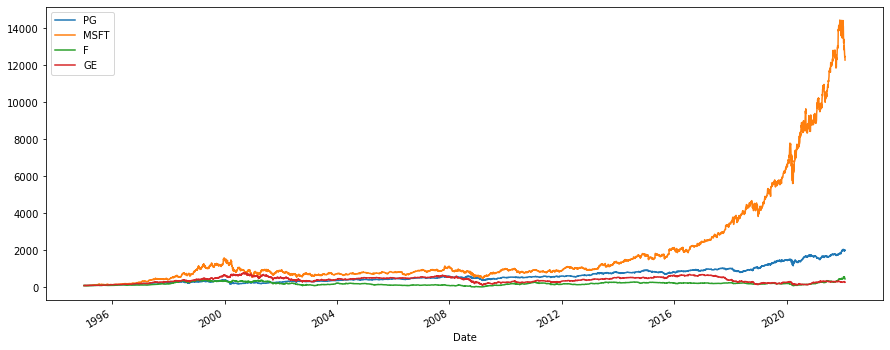

In [7]:
(mydata/mydata.iloc[0]*100).plot(figsize =(15,6));

In [8]:
mydata.loc['1995-1-03']

PG       7.971117
MSFT     2.374854
F        4.358238
GE      32.877308
Name: 1995-01-03 00:00:00, dtype: float64

In [9]:
mydata.iloc[0]

PG       7.971117
MSFT     2.374854
F        4.358238
GE      32.877308
Name: 1995-01-03 00:00:00, dtype: float64

Calculando a taxa de retorno do protifólio


In [10]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002050,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [11]:
weights =np.array([0.25, 0.25, 0.25, 0.25])

In [12]:
np.dot(returns, weights)

array([        nan,  0.00653986, -0.00922975, ..., -0.02016943,
       -0.00330624, -0.02716778])

In [13]:
annual_returns = returns.mean()*250
annual_returns

PG      0.135020
MSFT    0.225460
F       0.135900
GE      0.088652
dtype: float64

In [14]:
np.dot(annual_returns, weights)

0.14625797011497182

In [15]:
pfolio_1 = str(round(np.dot(annual_returns, weights),5)*100) + '%'
print (pfolio_1)

14.626%


In [16]:
weights_2 =np.array([0.4, 0.4, 0.15, 0.05])

In [17]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2) ,5)*100) + '%'
print (pfolio_1)
print (pfolio_2)

14.626%
16.901%
